In [1]:
import pandas
import uproot
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate
import pickle

from uncertainties import ufloat
from uncertainties import unumpy
import uncertainties as u

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
#Dowloading the data
bc_tree = uproot.open('/eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen_Bc2TauNuTAUHADNU.root')['events']
tree_gen = uproot.open("/eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen_Bc2TauNuTAUHADNU.root")["metadata"]

#Transforming the data into a dataframe
bc_df = bc_tree.arrays(library="pd", how="zip", filter_name=["EVT_*"])
df_gen = tree_gen.arrays(library="pd", how="zip")

### General parameters

In [3]:
#the for theoretical
#sim for simulated
#exp for experimental

In [4]:
N_Z0_array = np.array([5e11, 1e12, 2e12, 3e12, 4e12, 5e12])

In [5]:
### VALUES TO COMPUTE THE NORMALISATION CHANNEL YIELD

#Branching fraction Z->quark-pair
BF_Zbb = 0.1512

#Production ratio of Bc+ and B+
F_Bc = 0.0004 

#Branching fraction and errors for (Bc+ -> J/psi tau nu) 
the_BF_BcJpsitaunu = 0.0135 
err_BF_BcJpsitaunu = 0.0011 

print("BF_BcJpsitaunu = {}".format(err_BF_BcJpsitaunu/the_BF_BcJpsitaunu))

BF_BcJpsitaunu = ufloat(the_BF_BcJpsitaunu, err_BF_BcJpsitaunu) #


BF_BcJpsitaunu = 0.08148148148148149


In [6]:
### EXPERIMENTAL VALUES

#Branching fraction and errors for (J/psi -> mu mu)
exp_BF_Jpsimumu = 0.05961
err_BF_Jpsimumu = 0.00033

BF_Jpsimumu = ufloat(exp_BF_Jpsimumu, err_BF_Jpsimumu) #

print("BF_Jpsimumu = {}".format(err_BF_Jpsimumu, exp_BF_Jpsimumu))

#Branching fraction and errors for (tau -> 3pions nu)
exp_BF_tau3pion = 0.0931
err_BF_tau3pion = 0.0005

BF_tau3pion = ufloat(exp_BF_tau3pion, err_BF_tau3pion) #

print("BF_tau3pion = {}".format(err_BF_tau3pion, exp_BF_tau3pion))

#BF_Bctaunu = 0.0194
#BF_Butaunu = 1.09*10**(-4)
#BF_tau3pion = 0.0931

BF_Jpsimumu = 0.00033
BF_tau3pion = 0.0005


In [7]:
### CUT EFFICIENCIES

#Cut efficiencies for the optimised cut
the_epsilon_BcJpsitaunu = 0.1
err_epsilon_BcJpsitaunu = 0.001

epsilon_BcJpsitaunu = ufloat(the_epsilon_BcJpsitaunu, err_epsilon_BcJpsitaunu) #
print(epsilon_BcJpsitaunu)
print("epsilon_BcJpsitaunu = {}".format(err_epsilon_BcJpsitaunu/the_epsilon_BcJpsitaunu))

#Cut efficiency for Bc+ -> tau nu
nb_total_events = df_gen.iloc[0]["eventsProcessed"]

bc_sig = bc_df[bc_df['EVT_MVA2']> 0.95]
bc_sig = bc_sig[bc_sig['EVT_MVA1']> 0.95]

nb_bc_events = len(bc_sig)

Optimized_MVA1 = 0.9998599999999961  #+-0.00001
Optimized_MVA2 = 0.9963399999999984 #+-0.00001

df_bc_sig = bc_sig[bc_sig['EVT_MVA1']>Optimized_MVA1]
df_bc_sig = df_bc_sig[df_bc_sig['EVT_MVA2']>Optimized_MVA2]

nb_bc_after_cut = len(df_bc_sig)

initial_eff_Bctaunu = nb_bc_events / nb_total_events
eff_Bctaunu = nb_bc_after_cut / nb_bc_events

sim_epsilon_Bctaunu = initial_eff_Bctaunu * eff_Bctaunu
err_epsilon_Bctaunu = (1/nb_total_events)*np.sqrt(nb_bc_after_cut*(1-nb_bc_after_cut/nb_total_events))

epsilon_Bctaunu = ufloat(sim_epsilon_Bctaunu, err_epsilon_Bctaunu) #
print(epsilon_Bctaunu)
print("epsilon_Bctaunu = {}".format(err_epsilon_Bctaunu/sim_epsilon_Bctaunu))


0.1000+/-0.0010
epsilon_BcJpsitaunu = 0.01
0.003670+/-0.000019
epsilon_Bctaunu = 0.005210156353886405


### Signal yields for different number of $Z^0$ bosons

In [8]:
#5e12 Z0
sim_sig_5e12 = 4009.2649482816005
err_sig_5e12 = 125.2
sig_5e12 = ufloat(sim_sig_5e12, err_sig_5e12)

print("Signal yield precision for 5e12 = {}".format(err_sig_5e12/sim_sig_5e12))

#4e12 Z0
sim_sig_4e12 = 3207.4119586252805
err_sig_4e12 = 110.6
sig_4e12 = ufloat(sim_sig_4e12, err_sig_4e12)

print("Signal yield precision for 4e12 = {}".format(err_sig_4e12/sim_sig_4e12))

#3e12 Z0
sim_sig_3e12 = 2405.55896896896
err_sig_3e12 = 98.76
sig_3e12 = ufloat(sim_sig_3e12, err_sig_3e12)

print("Signal yield precision for 3e12 = {}".format(err_sig_3e12/sim_sig_3e12))

#2e12 Z0
sim_sig_2e12 = 1603.7059793126402
err_sig_2e12 = 80.78
sig_2e12 = ufloat(sim_sig_2e12, err_sig_2e12)

print("Signal yield precision for 2e12 = {}".format(err_sig_2e12/sim_sig_2e12))

#1e12 Z0
sim_sig_1e12 = 801.8529896563201
err_sig_1e12 = 57.34
sig_1e12 = ufloat(sim_sig_1e12, err_sig_1e12)
print("Signal yield precision for 1e12 = {}".format(err_sig_1e12/sim_sig_1e12))

#0.5e12 Z0
sim_sig_5e11 = 400.92649482816006
err_sig_5e11 = 40.26
sig_5e11 = ufloat(sim_sig_5e11, err_sig_5e11)
print("Signal yield precision for 5e11 = {}".format(err_sig_5e11/sim_sig_5e11))

Signal yield precision for 5e12 = 0.03122766931471107
Signal yield precision for 4e12 = 0.03448263005398407
Signal yield precision for 3e12 = 0.04105490710224795
Signal yield precision for 2e12 = 0.05037082921809825
Signal yield precision for 1e12 = 0.07150936735245739
Signal yield precision for 5e11 = 0.10041740947366354


In [9]:
#Creating the associated arrays
SIG = np.array([sig_5e11, sig_1e12, sig_2e12, sig_3e12, sig_4e12, sig_5e12])
print(SIG)
print(SIG[0])
print(unumpy.nominal_values(SIG))
print(unumpy.std_devs(SIG))

[400.92649482816006+/-40.26 801.8529896563201+/-57.34
 1603.7059793126402+/-80.78 2405.55896896896+/-98.76
 3207.4119586252805+/-110.6 4009.2649482816005+/-125.2]
(4.0+/-0.4)e+02
[ 400.92649483  801.85298966 1603.70597931 2405.55896897 3207.41195863
 4009.26494828]
[ 40.26  57.34  80.78  98.76 110.6  125.2 ]


### Normalisation channel yields for different number of $Z^0$ bosons

Ici on n'a pas d'incertitudes car on essaye juste d'observer la propagation des erreurs. Lors de la phase experimentale de cette étude, le yield de la normalisation channel sera calculé à l'aide de fit et on aura alors uneincertitude sur cette valeur mesurée.

In [10]:
def NORM_CHANNEL(N_Z0) :
    return N_Z0*BF_Zbb*2*F_Bc*the_BF_BcJpsitaunu*exp_BF_Jpsimumu*the_epsilon_BcJpsitaunu

#on met "exp_BF_Jpsimumu" car on suppose qu'il n'y a pas d'erreurs

In [53]:
#5e12 Z0
sim_norm_5e12 = NORM_CHANNEL(5*10**(12))
err_norm_5e12 = np.sqrt(sim_norm_5e12)
norm_5e12 = ufloat(sim_norm_5e12, err_norm_5e12)
print(norm_5e12)

print("Normalisation channel yield precision for 5e12 = {}".format(err_norm_5e12/sim_norm_5e12))

#4e12 Z0
sim_norm_4e12 = NORM_CHANNEL(4*10**(12))
err_norm_4e12 = np.sqrt(sim_norm_4e12)
norm_4e12 = ufloat(sim_norm_4e12, err_norm_4e12)

print("Normalisation channel yield precision for 4e12 = {}".format(err_norm_4e12/sim_norm_4e12))

#3e12 Z0
sim_norm_3e12 = NORM_CHANNEL(3*10**(12))
err_norm_3e12 = np.sqrt(sim_norm_3e12)
norm_3e12 = ufloat(sim_norm_3e12, err_norm_3e12)

print("Normalisation channel yield precision for 3e12 = {}".format(err_norm_3e12/sim_norm_3e12))

#2e12 Z0
sim_norm_2e12 = NORM_CHANNEL(2*10**(12))
err_norm_2e12 = np.sqrt(sim_norm_2e12)
norm_2e12 = ufloat(sim_norm_2e12, err_norm_2e12)

print("Normalisation channel yield precision for 2e12 = {}".format(err_norm_2e12/sim_norm_2e12))

#1e12 Z0
sim_norm_1e12 = NORM_CHANNEL(1*10**(12))
err_norm_1e12 = np.sqrt(sim_norm_1e12)
norm_1e12 = ufloat(sim_norm_1e12, err_norm_1e12)

print("Normalisation channel yield precision for 1e12 = {}".format(err_norm_1e12/sim_norm_1e12))

#0.5e12 Z0
sim_norm_5e11 = NORM_CHANNEL(5*10**(11))
err_norm_5e11 = np.sqrt(sim_norm_5e11)
norm_5e11 = ufloat(sim_norm_5e11, err_norm_5e11)

print("Normalisation channel yield precision for 5e11 = {}".format(err_norm_5e11/sim_norm_5e11))

(4.867+/-0.022)e+04
Normalisation channel yield precision for 5e12 = 0.00453281154784069
Normalisation channel yield precision for 4e12 = 0.005067837375083911
Normalisation channel yield precision for 3e12 = 0.0058518345454278845
Normalisation channel yield precision for 2e12 = 0.007167004347744933
Normalisation channel yield precision for 1e12 = 0.010135674750167823
Normalisation channel yield precision for 5e11 = 0.014334008695489866


In [12]:
#Creating the associated arrays
NORM = np.array([norm_5e11, norm_1e12, norm_2e12, norm_3e12, norm_4e12, norm_5e12])
print(NORM)
print(unumpy.nominal_values(NORM))
print(unumpy.std_devs(NORM))

[4867.0372800000005+/-69.76415469279335
 9734.074560000001+/-98.66141373404297
 19468.149120000002+/-139.5283093855867
 29202.223680000003+/-170.88658133393622
 38936.298240000004+/-197.32282746808593
 48670.372800000005+/-220.61362786555142]
[ 4867.03728  9734.07456 19468.14912 29202.22368 38936.29824 48670.3728 ]
[ 69.76415469  98.66141373 139.52830939 170.88658133 197.32282747
 220.61362787]


In [13]:
BF_SIG= []

for i in range (len(NORM)) :
    BF_SIG.append(SIG[i]/NORM[i] * epsilon_BcJpsitaunu/epsilon_Bctaunu * BF_Jpsimumu/BF_tau3pion * BF_BcJpsitaunu)

BF_SIG = np.array(BF_SIG)

In [14]:
print(BF_SIG)
print(unumpy.nominal_values(BF_SIG))
print(unumpy.std_devs(BF_SIG))

#remarque : on met un s à values et devs quand on considère plusieurs variables (par exemple dans un array) 
#           mais pas quand on considère un unique élement

[0.0194+/-0.0025379906893672178 0.0194+/-0.0021288960355412795
 0.0194+/-0.0018823453283016993
 0.019399999999999997+/-0.0017933846305544805
 0.0194+/-0.001739586483370865 0.0194+/-0.0017157302744338703]
[0.0194 0.0194 0.0194 0.0194 0.0194 0.0194]
[0.00253799 0.0021289  0.00188235 0.00179338 0.00173959 0.00171573]


In [15]:
for i in range (len(BF_SIG)):
    text = r"For {:.0e} Z0 bosons we have B(Bc+ -> tau+ nu) = {:.4f} ± {:.4f}"
    print(text.format(N_Z0_array[i], unumpy.nominal_values(BF_SIG)[i], unumpy.std_devs(BF_SIG)[i]))                                                                                      

For 5e+11 Z0 bosons we have B(Bc+ -> tau+ nu) = 0.0194 ± 0.0025
For 1e+12 Z0 bosons we have B(Bc+ -> tau+ nu) = 0.0194 ± 0.0021
For 2e+12 Z0 bosons we have B(Bc+ -> tau+ nu) = 0.0194 ± 0.0019
For 3e+12 Z0 bosons we have B(Bc+ -> tau+ nu) = 0.0194 ± 0.0018
For 4e+12 Z0 bosons we have B(Bc+ -> tau+ nu) = 0.0194 ± 0.0017
For 5e+12 Z0 bosons we have B(Bc+ -> tau+ nu) = 0.0194 ± 0.0017


In [31]:
RATIO = []

for elt in BF_SIG :
    RATIO.append(elt/BF_BcJpsitaunu)  
    
RATIO = np.array(RATIO)

In [32]:
print(RATIO)
print(unumpy.nominal_values(RATIO))
print(unumpy.std_devs(RATIO))

[1.4370370370370371+/-0.1470823784905105
 1.4370370370370371+/-0.10562913720486201
 1.4370370370370371+/-0.07570365461843902
 1.437037037037037+/-0.06274415766074659
 1.4370370370370371+/-0.053795316173338444
 1.4370370370370371+/-0.049412964603421344]
[1.43703704 1.43703704 1.43703704 1.43703704 1.43703704 1.43703704]
[0.14708238 0.10562914 0.07570365 0.06274416 0.05379532 0.04941296]


In [35]:
for i in range (len(RATIO)):
    text = r"For {:.0e} Z0 bosons we have R = B(Bc+ -> tau+ nu)/B(Bc+ -> J/psi tau+ nu) = {:.8f} ± {:.8f}"
    print(text.format(N_Z0_array[i], unumpy.nominal_values(RATIO)[i], unumpy.std_devs(RATIO)[i]))                                                                                      

For 5e+11 Z0 bosons we have R = B($B_c^+$ -> $\tau^+$ $\nu$)/B(Bc+ -> J/psi tau+ nu) = 1.43703704 ± 0.14708238
For 1e+12 Z0 bosons we have R = B($B_c^+$ -> $\tau^+$ $\nu$)/B(Bc+ -> J/psi tau+ nu) = 1.43703704 ± 0.10562914
For 2e+12 Z0 bosons we have R = B($B_c^+$ -> $\tau^+$ $\nu$)/B(Bc+ -> J/psi tau+ nu) = 1.43703704 ± 0.07570365
For 3e+12 Z0 bosons we have R = B($B_c^+$ -> $\tau^+$ $\nu$)/B(Bc+ -> J/psi tau+ nu) = 1.43703704 ± 0.06274416
For 4e+12 Z0 bosons we have R = B($B_c^+$ -> $\tau^+$ $\nu$)/B(Bc+ -> J/psi tau+ nu) = 1.43703704 ± 0.05379532
For 5e+12 Z0 bosons we have R = B($B_c^+$ -> $\tau^+$ $\nu$)/B(Bc+ -> J/psi tau+ nu) = 1.43703704 ± 0.04941296


In [16]:
print(r"$Z^0$")

$Z^0$


In [17]:
### Branching fraction vs Number of Z0 bosons

In [18]:
colour_bc = "#fdae61"

[]

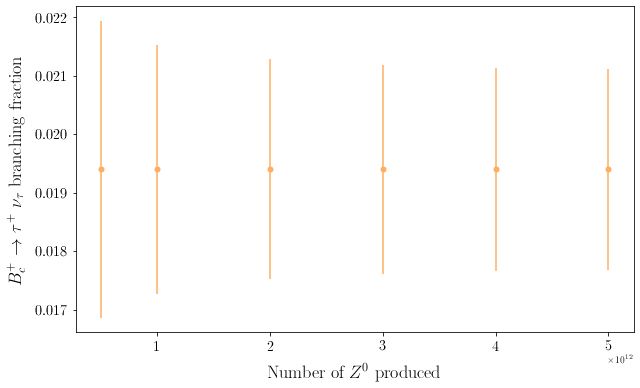

In [51]:
plt.figure(figsize=(10,6))

plt.errorbar(N_Z0_array,
             unumpy.nominal_values(BF_SIG),
             yerr = unumpy.std_devs(BF_SIG),
             fmt = 'o', 
             color = colour_bc, 
             markersize = 5)

#plt.xlim(min_bin,max_bin)
plt.xlabel(r"Number of $Z^0$ produced", fontsize=18, labelpad=10)
plt.ylabel(r"$B_c^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ branching fraction", fontsize=18, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.legend(fontsize=15)
plt.plot()


[]

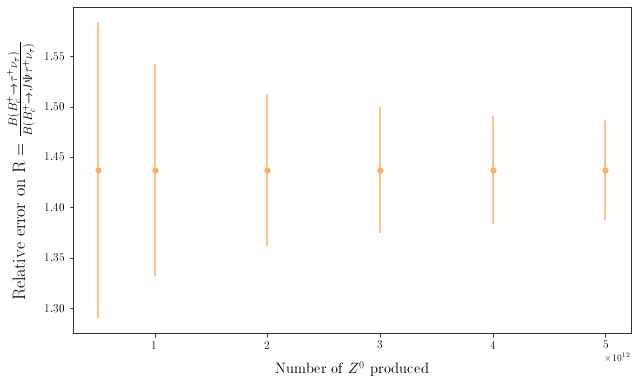

In [50]:
plt.figure(figsize=(10,6))

plt.errorbar(N_Z0_array,
             unumpy.nominal_values(RATIO),
             yerr = unumpy.std_devs(RATIO),
             fmt = 'o', 
             color = colour_bc, 
             markersize = 5)

#plt.xlim(min_bin,max_bin)
plt.xlabel(r"Number of $Z^0$ produced", fontsize=15, labelpad=10)
plt.ylabel(r"Relative error on R = $\frac{B(B_c^+ \rightarrow \tau^+ \nu_\tau)}{B(B_c^+ \rightarrow J\Psi \tau^+ \nu_\tau)}$", fontsize=18, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=12)
#plt.legend(fontsize=15)
plt.plot()

#{B($B_c^+$ $\rightarrow$ $J/\Psi$ $\tau^+$ $\nu_\tau$)

[]

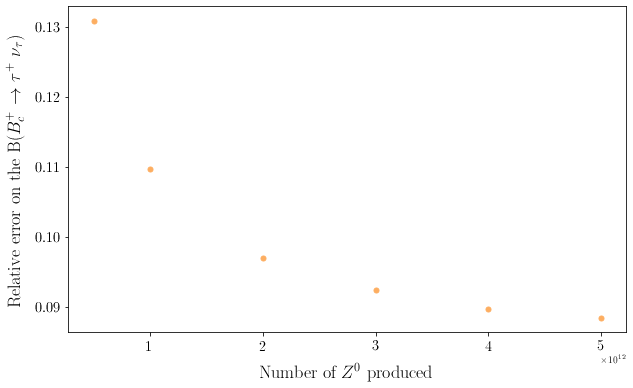

In [49]:
plt.figure(figsize=(10,6))

plt.errorbar(N_Z0_array,
             unumpy.std_devs(BF_SIG)/unumpy.nominal_values(BF_SIG),
             fmt = 'o', 
             color = colour_bc, 
             markersize = 5)

#plt.xlim(min_bin,max_bin)
plt.xlabel(r"Number of $Z^0$ produced", fontsize=18, labelpad=10)
plt.ylabel(r"Relative error on the B($B_c^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$)", fontsize=18, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.legend(fontsize=15)
plt.plot()

[]

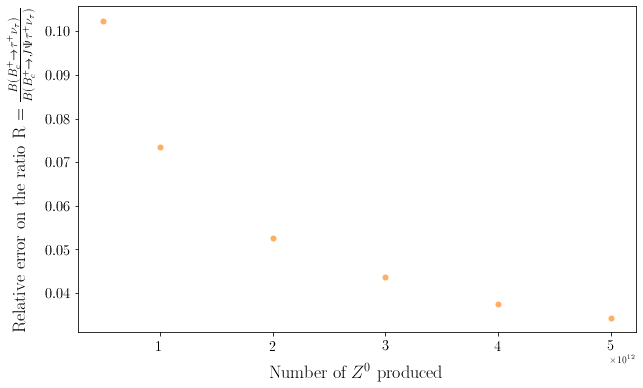

In [47]:
plt.figure(figsize=(10,6))

plt.errorbar(N_Z0_array,
             unumpy.std_devs(RATIO)/unumpy.nominal_values(RATIO),
             fmt = 'o', 
             color = colour_bc, 
             markersize = 5)

#plt.xlim(min_bin,max_bin)
plt.xlabel(r"Number of $Z^0$ produced", fontsize=18, labelpad=10)
plt.ylabel(r"Relative error on R = $\frac{B(B_c^+ \rightarrow \tau^+ \nu_\tau)}{B(B_c^+ \rightarrow J\Psi \tau^+ \nu_\tau)}$", fontsize=18, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.legend(fontsize=15)
plt.plot()